[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/okada-tak/deep-learning-from-scratch/blob/master/notebooks/ch03.ipynb)
[![Open in SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/okada-tak/deep-learning-from-scratch/blob/master/notebooks/ch03.ipynb)  
# ■追記（岡田）
# 3章 ニューラルネットワーク のまとめ
- ニューラルネットワークでは、活性化関数としてシグモイド関数やReLU関数のような滑らかに変化する関数を利用する。  
　注：「滑らかに」とあるがReLU関数は微分可能ではないよね？  
　　　（数学的にはx=0で微分不可だが、微分係数0側 or 1側に含めたりするみたい。）
- NumPyの多次元配列をうまく使うことで、ニューラルネットワークを効率良く実装することができる。  
- 機械学習の問題は、回帰問題と分類問題に大別できる。  
- 出力層で使用する活性化関数は、回帰問題では恒等関数、分類問題ではソフトマックス関数を一般的に利用する。  
- 分類問題では、出力層のニューロンの数を分類するクラス数に設定する。  
- 入力データのまとまりをバッチと言い、バッチ単位で推論処理を行うことで、計算を高速に行うことができる。

# ch03/step_function.py

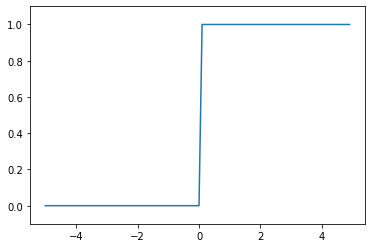

In [ ]:
import numpy as np
import matplotlib.pylab as plt


def step_function(x):
    return np.array(x > 0, dtype=np.int32)

X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)  # 図で描画するy軸の範囲を指定
plt.show()

# ch03/sigmoid.py

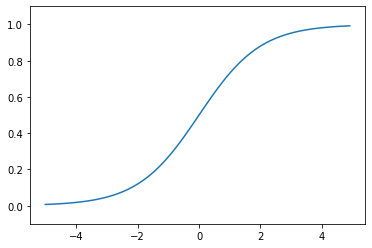

In [ ]:
import numpy as np
import matplotlib.pylab as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()


# ch03/sig_step_compare.py

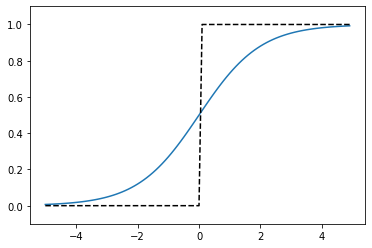

In [ ]:
import numpy as np
import matplotlib.pylab as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))    


def step_function(x):
    return np.array(x > 0, dtype=np.int32)

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1) #図で描画するy軸の範囲を指定
plt.show()

# ch03/relu.py

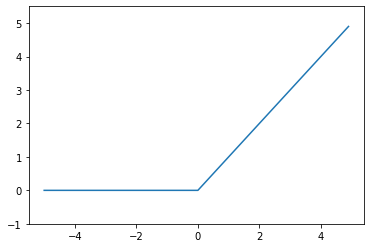

In [ ]:
import numpy as np
import matplotlib.pylab as plt


def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

# ■追記（岡田）
Leaky ReLUについてもサンプルを追加する。  
https://atmarkit.itmedia.co.jp/ait/articles/2005/13/news009.html

Leaky ReLU（Leaky Rectified Linear Unit：LReLU）とは、関数への入力値が0より下の場合には出力値が入力値をα倍した値（※αの値は基本的に0.01）、入力値が0以上の場合には出力値が入力値と同じ値となる関数である。

↓にサンプルを表示している（差がわかりづらいのでαを0.1としている）。



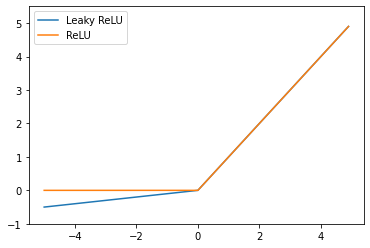

In [ ]:
import numpy as np
import matplotlib.pylab as plt

def lrelu(x, alpha=0.1):
  return np.where(x >= 0.0, x, alpha * x)


x = np.arange(-5.0, 5.0, 0.1)
y = lrelu(x)
plt.plot(x, y, label='Leaky ReLU')
plt.ylim(-1.0, 5.5)

# ReLUも表示
y1=relu(x)
plt.plot(x, y1, label='ReLU')
plt.legend()
plt.show()

# ■追記（岡田）
tanhについてもサンプルを追加する。  
https://atmarkit.itmedia.co.jp/ait/articles/2003/19/news015.html

↓にサンプルを表示している。



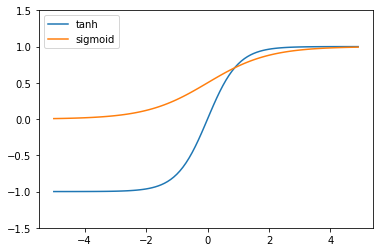

In [ ]:
import numpy as np
import matplotlib.pylab as plt

def tanh(x):
  return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = tanh(x)
plt.plot(x, y, label='tanh')
plt.ylim(-1.5, 1.5)

# sigmoidも表示
y1 = sigmoid(x)
plt.plot(x, y1, label='sigmoid')
plt.legend()
plt.show()

# ■追記（岡田）
まだでてこないけど、今後のためにそれぞれの導関数のグラフをのせておく。

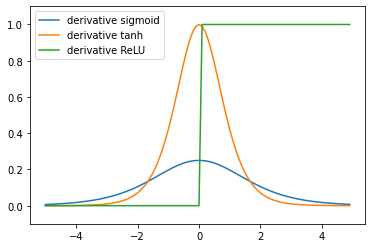

In [ ]:
import numpy as np
import matplotlib.pylab as plt

def der_sigmoid(x):
  return sigmoid(x) * (1.0 - sigmoid(x))

def der_tanh(x):
  return 1.0 - (tanh(x) ** 2)

def der_relu(x):
    y = np.where( x > 0, 1, 0)
    return y

x = np.arange(-5.0, 5.0, 0.1)
y1 = der_sigmoid(x)
y2 = der_tanh(x)
y3 = der_relu(x)
plt.plot(x, y1, label='derivative sigmoid')
plt.plot(x, y2, label='derivative tanh')
plt.plot(x, y3, label='derivative ReLU')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()

# ■追記（岡田）
p.69 式(3.11)の補足。

$C\exp(a_k) = \exp(a_k+\log C)$　のところ。  
p.69の下の例では、「最大値を減算する」ことでオーバーフローを防いでいる。  
$+\log C$のところを「$- max(a)$」としている。  

$\exp(a_k+\log C) = \exp(a_k) \times \exp(\log C)$  
はいいとして、$\exp(\log C)=C$なんだっけ？というところ。  
$t=\log C=\log e^t$  
$C= e^t = e^{\log C}=\exp(\log C)$

# ■追記（岡田）Colaboratory用
Google Colaboratoryの場合、Google Driveに  
dl-from-scratch/ch03  
というフォルダを用意し、そこにこのjupyter notebookを配置。  
(dl-from-scratchの部分は任意。)  
また、datasetフォルダとcommonフォルダを
dl-from-scratch/dataset  
dl-from-scratch/common
にコピーしておく。  

以下のセルでGoogle Driveをマウント。許可を求められるので許可する。

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ■追記（岡田）Colaboratory用
chdirする。

In [ ]:
import sys,os
os.chdir('/content/drive/My Drive/dl-from-scratch/')
os.getcwd()

'/content/drive/My Drive/dl-from-scratch'

# ch03/mnist_show.py

In [ ]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 形状を元の画像サイズに変形
print(img.shape)  # (28, 28)

img_show(img)

5
(784,)
(28, 28)


# ch03/neuralnet_mnist.py

# ■追記（岡田）Colaboratory用
chdirする。

In [ ]:
import sys,os
os.chdir('/content/drive/My Drive/dl-from-scratch/ch03')
os.getcwd()

'/content/drive/My Drive/dl-from-scratch/ch03'

In [ ]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("../ch03/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 最も確率の高い要素のインデックスを取得
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


# ■追記（岡田）
p.76  
ひとつ目の隠れ層が50個、2つ目の層が100個で、この50と100は任意の値に設定できると書いてあるが、そのように構成したネットワークをsample_weight.pklとしてここでは提供しているという意味。コードのどこかをいじると簡単に層のニューロン数を変更できるという意味ではない。  

↓でshapeだけ確認する。

$784(28 \times 28) \times 50 \times 100 \times 10$であることがわかる。

In [ ]:
print(network['W1'].shape)
print(network['W2'].shape)
print(network['W3'].shape)
print(network['b1'].shape)
print(network['b2'].shape)
print(network['b3'].shape)

(784, 50)
(50, 100)
(100, 10)
(50,)
(100,)
(10,)


# ch03/neuralnet_mnist_batch.py

In [ ]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("../ch03/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()

batch_size = 100 # バッチの数
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))


Accuracy:0.9352
